<a href="https://colab.research.google.com/github/fatimabalig/Internship/blob/main/CarPricePrediction_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load Dataset
data_path = '/content/car data.csv'
data = pd.read_csv(data_path)

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Basic Data Analysis
print("\nDataset Information:")
data.info()

print("\nSummary Statistics:")
print(data.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Summary Statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
mi

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Drop the 'Car_Name' column as it is not useful for prediction
data = data.drop(['Car_Name'], axis=1)


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['Fuel_Type', 'Selling_type', 'Transmission']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))  # Ensure all are strings for encoding
    label_encoders[column] = le


In [ ]:
# Feature Engineering
# Create a new feature for the car's age
current_year = 2025
data['Car_Age'] = current_year - data['Year']
data = data.drop(['Year'], axis=1)

In [ ]:
# Feature Selection
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Model Performance:
Mean Squared Error: 0.9348405547540974
R-squared: 0.9594175457570582


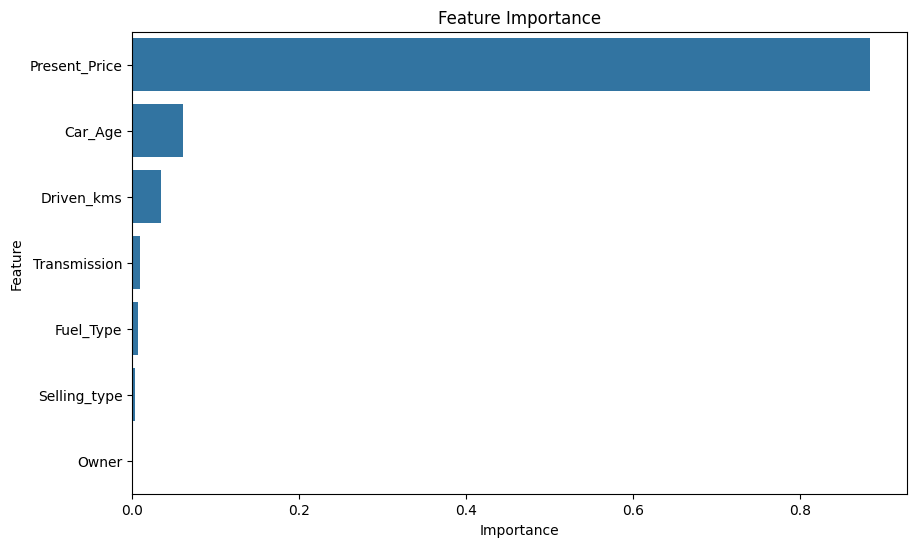

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


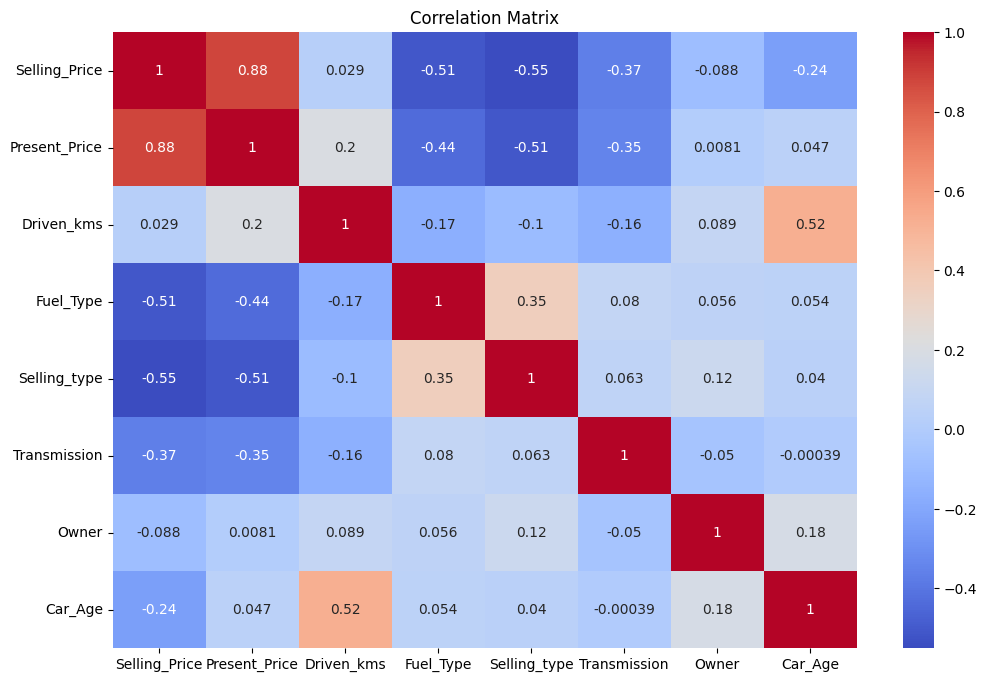

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


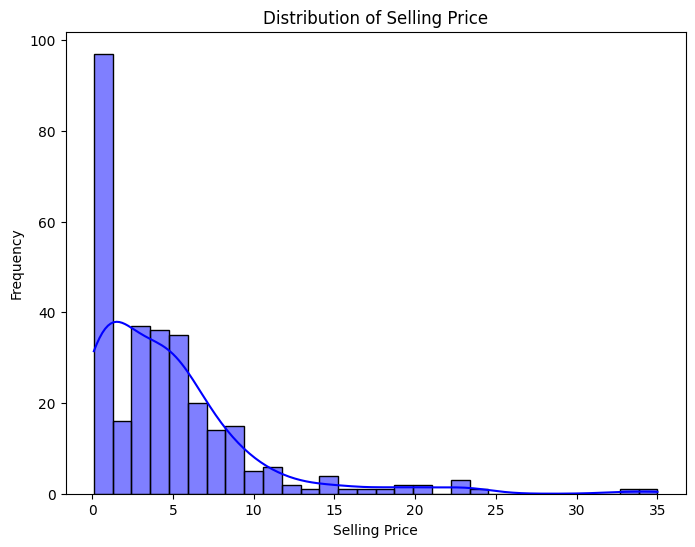

In [ ]:
# Distribution of Selling Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Selling_Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


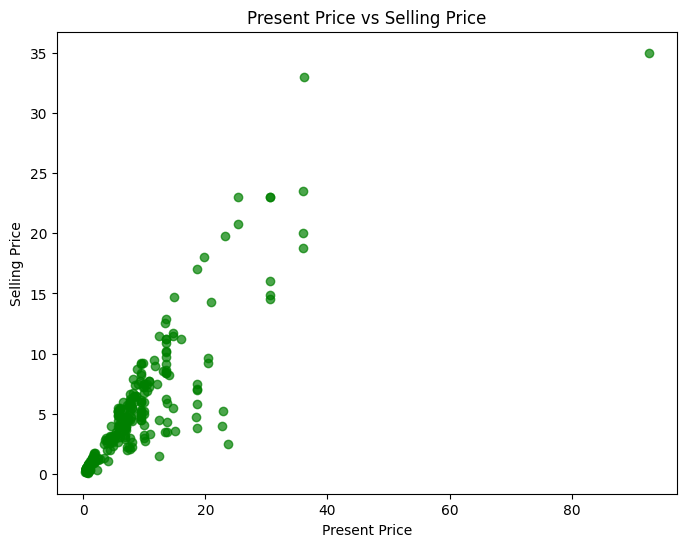

In [ ]:
# Scatter Plot: Present Price vs Selling Price
plt.figure(figsize=(8, 6))
plt.scatter(data['Present_Price'], data['Selling_Price'], alpha=0.7, color='green')
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


In [ ]:
# Prediction Based on User Input
def predict_price():
    print("\n--- Car Price Prediction ---")
    present_price = float(input("Enter Present Price of the car (in lakhs): "))
    driven_kms = int(input("Enter Kilometers Driven: "))
    fuel_type = input("Enter Fuel Type (Petrol/Diesel/CNG): ")
    selling_type = input("Enter Selling Type (Dealer/Individual): ")
    transmission = input("Enter Transmission Type (Manual/Automatic): ")
    owner = int(input("Enter Number of Previous Owners (0/1/2/3): "))
    car_age = int(input("Enter Age of the Car (in years): "))

    # Encode categorical inputs
    fuel_type_encoded = label_encoders['Fuel_Type'].transform([fuel_type])[0]
    selling_type_encoded = label_encoders['Selling_type'].transform([selling_type])[0]
    transmission_encoded = label_encoders['Transmission'].transform([transmission])[0]

    # Create input array for prediction
    input_data = np.array([[present_price, driven_kms, fuel_type_encoded, selling_type_encoded,
                            transmission_encoded, owner, car_age]])

    # Predict price
    predicted_price = model.predict(input_data)[0]
    print(f"\nPredicted Selling Price of the Car: {predicted_price:.2f} lakhs")
predict_price()


--- Car Price Prediction ---
Enter Present Price of the car (in lakhs): 5.59
Enter Kilometers Driven: 27000
Enter Fuel Type (Petrol/Diesel/CNG): Petrol
Enter Selling Type (Dealer/Individual): Dealer
Enter Transmission Type (Manual/Automatic): Manual
Enter Number of Previous Owners (0/1/2/3): 0
Enter Age of the Car (in years): 11

Predicted Selling Price of the Car: 3.86 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
